Create the SQLite database

In [1]:
import sqlite3

# Create or connect to a database file
conn = sqlite3.connect('sales_data.db')
cursor = conn.cursor()

# Create the sales table
cursor.execute('''
    CREATE TABLE IF NOT EXISTS sales (
        id INTEGER PRIMARY KEY,
        product TEXT,
        quantity INTEGER,
        price REAL
    )
''')

# Insert sample data
sample_data = [
    ('Laptop', 5, 800),
    ('Mouse', 10, 25),
    ('Keyboard', 7, 45),
    ('Monitor', 3, 200),
    ('Laptop', 2, 800),
    ('Mouse', 4, 25),
]

cursor.executemany('INSERT INTO sales (product, quantity, price) VALUES (?, ?, ?)', sample_data)
conn.commit()
conn.close()


Query the data and load it into pandas

In [2]:
import sqlite3
import pandas as pd

# Connect to the database
conn = sqlite3.connect('sales_data.db')

# Write your SQL query
query = """
SELECT
    product,
    SUM(quantity) AS total_qty,
    SUM(quantity * price) AS revenue
FROM sales
GROUP BY product
"""

# Load query result into pandas
df = pd.read_sql_query(query, conn)
print(df)  # This prints the table


    product  total_qty  revenue
0  Keyboard          7    315.0
1    Laptop          7   5600.0
2   Monitor          3    600.0
3     Mouse         14    350.0


Plot a basic bar chart

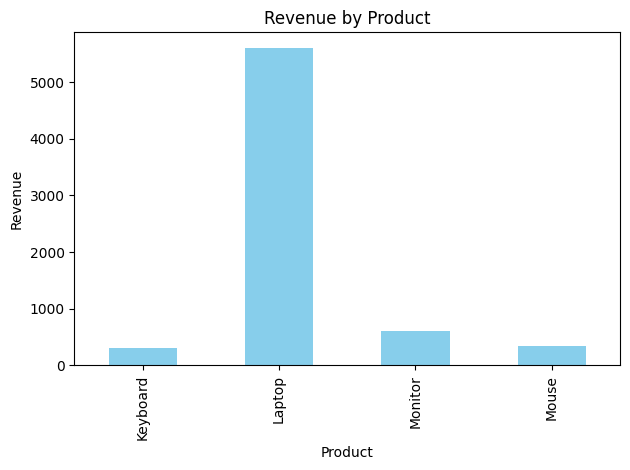

<Figure size 640x480 with 0 Axes>

In [3]:
import matplotlib.pyplot as plt

# Create a bar chart of revenue per product
df.plot(kind='bar', x='product', y='revenue', color='skyblue', legend=False)

# Add labels and title
plt.title('Revenue by Product')
plt.xlabel('Product')
plt.ylabel('Revenue')

# Show the chart
plt.tight_layout()
plt.show()

# Optional: Save the chart as a PNG image
plt.savefig("sales_chart.png")
